In [2]:
import os
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sn

## Loading reports

In [6]:
reports = pd.read_csv("data/Salesforce/Salesforce/ELF/Report/2022-06-20_Report.csv")

convert DB_TOTAL_TIME from nanoseconds to miliseconds 

In [7]:
reports['DB_TOTAL_TIME'] = reports.apply(lambda reports:(reports['DB_TOTAL_TIME']/1000000), axis=1)


calculating application 

In [8]:
reports['IS_CPU_TIME_BIGGER_THAN_DB_TIME'] = reports.apply(lambda reports:(reports['DB_TOTAL_TIME'] < reports['CPU_TIME']), axis=1)


In [9]:
 
reports['IS_CPU_TIME_BIGGER_THAN_DB_TIME'].value_counts()

False    463
True     242
Name: IS_CPU_TIME_BIGGER_THAN_DB_TIME, dtype: int64

### In most cases the time for a database round trip, includes time spent in the JDBC driver, network to the database, is bigger than the CPU time (This field indicates the amount of activity taking place in the app server layer). 

In [10]:
reports.shape

(705, 32)

#### The time for the server(DB_TOTAL_TIME) is bigger than the time the user spend with they own code (CPU_TIME)


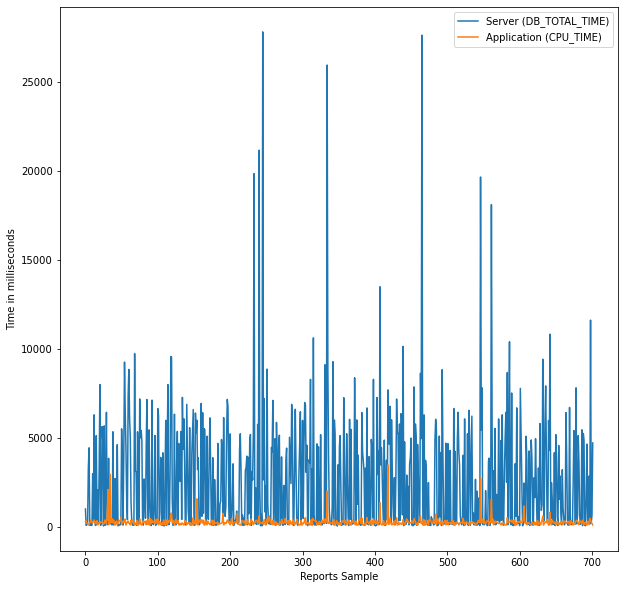

In [15]:
# Filter for better visualization
reports = reports[reports["DB_TOTAL_TIME"] <30000 ]

reports['DB_TOTAL_TIME'] = reports['DB_TOTAL_TIME'].apply(np.int64)
reports['CPU_TIME'] = reports['CPU_TIME'].apply(np.int64)

# transforms columns in lists
LIST_DB_TOTAL_TIME = reports["DB_TOTAL_TIME"].to_numpy()
LIST_CPU_TIME = reports["CPU_TIME"].to_numpy()
ids = reports["REPORT_ID_DERIVED"].to_numpy()


df = pd.DataFrame({
    'Server (DB_TOTAL_TIME)':LIST_DB_TOTAL_TIME,
    'Application (CPU_TIME)': LIST_CPU_TIME,
    #"id": ids,
})


# plot multiple columns such as DB_TOTAL_TIME and CPU_TIME from dataframe
df.plot( y=["Server (DB_TOTAL_TIME)", "Application (CPU_TIME)"],
        kind="line", figsize=(10, 10), rot = 0)
plt.ylabel('Time in milliseconds') 
plt.xlabel('Reports Sample')
# display plot
plt.show()


### ROW_COUNT and AVERAGE_ROW_SIZE

####  ROW_COUNT is the number of rows were processed in the Report Event.  AVERAGE_ROW_SIZE is the average row size of all rows in the report event in bytes.  A large average size, coupled with a high ROW_COUNT, can indicate that a user is downloading information for fraudulent purposes.

### MEDIAN AND MEAN

ROW_COUNT

In [52]:
ROW_COUNT_MEDIAN = reports["ROW_COUNT"].median()
print(ROW_COUNT_MEDIAN)

6.0


In [53]:
ROW_COUNT_MEAN = reports["ROW_COUNT"].mean()
print(ROW_COUNT_MEAN)

287.4145299145299


AVERAGE_ROW_SIZE

In [54]:
AVERAGE_ROW_SIZE_MEDIAN = reports["AVERAGE_ROW_SIZE"].median()
print(AVERAGE_ROW_SIZE_MEDIAN)

613.5


In [55]:
AVERAGE_ROW_SIZE_MEAN = reports["AVERAGE_ROW_SIZE"].mean()
print(AVERAGE_ROW_SIZE_MEAN)

554.5370370370371


### Filter reports with AVERAGE_ROW_SIZE and ROW_COUNT greater than the medians

In [56]:
filteredReport = reports[(reports["AVERAGE_ROW_SIZE"] > AVERAGE_ROW_SIZE_MEDIAN) & (reports["ROW_COUNT"] > ROW_COUNT_MEDIAN)]

In [57]:
filteredReport.drop(['URI',
 'SESSION_KEY',
 'LOGIN_KEY',
 'USER_TYPE',
 'REQUEST_STATUS',
 'DB_TOTAL_TIME',
 'ENTITY_NAME',
 'DISPLAY_TYPE',
 'RENDERING_TYPE',
 'REPORT_ID',
 'NUMBER_EXCEPTION_FILTERS',
 'NUMBER_COLUMNS',
 'SORT',
 'NUMBER_BUCKETS',
 'TIMESTAMP_DERIVED',
 'USER_ID_DERIVED',
 'CLIENT_IP',
 'URI_ID_DERIVED',
 'REPORT_ID_DERIVED',
 'ORIGIN'], axis=1)

,EVENT_TYPE,TIMESTAMP,REQUEST_ID,ORGANIZATION_ID,USER_ID,RUN_TIME,CPU_TIME,ROW_COUNT,AVERAGE_ROW_SIZE,DB_BLOCKS,DB_CPU_TIME,IS_CPU_TIME_BIGGER_THAN_DB_TIME
1,Report,2.022062e+13,TID:9360605190000141c8,00D0b000000GaMp,0056P0000011h1x,538,364,9,864,2439,40,True
2,Report,2.022062e+13,TID:43400500000b9a797a,00D0b000000GaMp,0052R000009TlEN,368,228,60,798,917,10,True
7,Report,2.022062e+13,TID:289831900005ce827a,00D0b000000GaMp,0050b000004K6Tw,535,327,8,672,2845,60,True
8,Report,2.022062e+13,TID:526446900008f8d67f,00D0b000000GaMp,0050b000004K6Tw,499,399,8,672,3361,20,True
10,Report,2.022062e+13,SLB:e354899909bc5f3101464d50e8c4e5ea,00D0b000000GaMp,0050b000004KNJd,3317,256,8,894,5986,30,False
...,...,...,...,...,...,...,...,...,...,...,...,...
689,Report,2.022062e+13,SLB:fd04fdffb7e3ab56f95956d4a4f1dc64,00D0b000000GaMp,0050b000004KNJd,5734,268,13,918,5998,40,False
690,Report,2.022062e+13,SLB:fe7972f2c81bad5511f94d34b0cd1843,00D0b000000GaMp,0050b000004K3eB,486,396,12,3548,2570,40,True
700,Report,2.022062e+13,TID:928012500000897754,00D0b000000GaMp,0051P000003jYnQ,707,494,13,1154,20212,40,True
701,Report,2.022062e+13,SLB:595e867122bd95e899db5709a361e5fd,00D0b000000GaMp,0050b000004KNJd,7834,417,679,896,9182,40,False


### Top reports in this filter 

<AxesSubplot:>

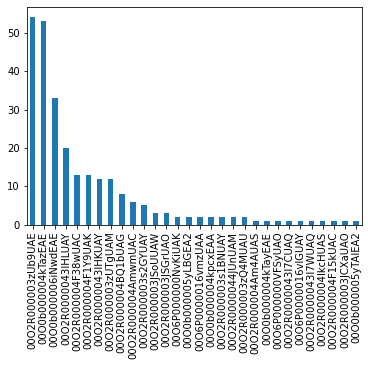

In [88]:
filteredReport['REPORT_ID_DERIVED'].value_counts().head(30).plot(kind='bar')

### Correlation analysis


In [16]:
correlation = reports.corr()

<AxesSubplot:>

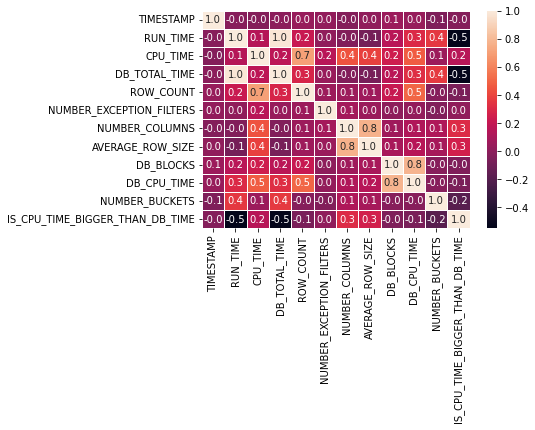

In [103]:
# plot correlation matrixda matriz de correlação

plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

As we can see the columns DB_BLOCKS and DB_CPU_TIME has a high correlation, so how much blocks you have in your DB, more time you spend in the CPU. In the application level we have a correlation with ROW_COUNT and CPU_TIME, as NUMBER_COLUMNS and AVERAGE_ROW_SIZE



### Users with more reports

In [84]:
reports['USER_ID_DERIVED'].value_counts().head(10)

0050b000004KNJdAAO    80
0052R000009To4TQAS    12
0052R000009TkFeQAK     7
0050b000004KDSSAA4     6
0050b000004K6qmAAC     5
0051P000003jYtGQAU     5
0050b000004K6z2AAC     4
0050b000004KJ1wAAG     4
0052R00000A02CyQAJ     4
0052R00000ASP0SQAX     4
Name: USER_ID_DERIVED, dtype: int64